##0 - Load the Data and Visualize it!

### Link Google Colab to Google Drive

### Import the necessary libraries

In [13]:
print(cv.__version__)
print()
print(o3d.__version__)
print()
import sys
print(sys.version)
print()

4.10.0

0.18.0

3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]


In [53]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d


### Load the Files

In [ ]:
#make the object having all files in it 
img_files=sorted(Path("data/img").glob("*.png"))
label_files=sorted(Path("data/label").glob("*.txt"))
point_files=sorted(Path("data/velodyne").glob("*.pcd"))
calib_files=sorted(Path("data/calib").glob("*.txt"))

for file in img_files:
    print(file.name )
print(img_files)
print()
for file in label_files:
    print(file.name)
print(label_files)
print()
for file in point_files:
    print(file.name)
print(point_files)
print()
for file in calib_files:
    print(file.name)
print(calib_files)




000031.png
000035.png
000060.png
000080.png
000134.png
[WindowsPath('data/img/000031.png'), WindowsPath('data/img/000035.png'), WindowsPath('data/img/000060.png'), WindowsPath('data/img/000080.png'), WindowsPath('data/img/000134.png')]

000031.txt
000035.txt
000060.txt
000080.txt
000134.txt
[WindowsPath('data/label/000031.txt'), WindowsPath('data/label/000035.txt'), WindowsPath('data/label/000060.txt'), WindowsPath('data/label/000080.txt'), WindowsPath('data/label/000134.txt')]

000031.pcd
000035.pcd
000060.pcd
000080.pcd
000134.pcd
[WindowsPath('data/velodyne/000031.pcd'), WindowsPath('data/velodyne/000035.pcd'), WindowsPath('data/velodyne/000060.pcd'), WindowsPath('data/velodyne/000080.pcd'), WindowsPath('data/velodyne/000134.pcd')]

000031.txt
000035.txt
000060.txt
000080.txt
000134.txt
[WindowsPath('data/calib/000031.txt'), WindowsPath('data/calib/000035.txt'), WindowsPath('data/calib/000060.txt'), WindowsPath('data/calib/000080.txt'), WindowsPath('data/calib/000134.txt')]

(375, 1

In [51]:
index=0
img=cv.imread(str(img_files[index]))
rgb_img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
cloud=o3d.io.read_point_cloud(str(point_files[index]))
points=np.asarray(cloud.points)
print()
print(rgb_img.shape,points.shape,'\n')
print("Image shape:", rgb_img.shape)  # (H, W, 3)
print("Number of LiDAR points:", points.shape)  # (N, 3)
print(rgb_img[:1],"\n\n",points[:1])



(375, 1242, 3) (121291, 3) 

Image shape: (375, 1242, 3)
Number of LiDAR points: (121291, 3)
[[[133 159 244]
  [127 175 255]
  [176 192 255]
  ...
  [ 72  91  69]
  [ 71  93  66]
  [ 75  95  62]]] 

 [[21.75099945  2.53399992  0.94999999]]


<function matplotlib.pyplot.show(close=None, block=None)>

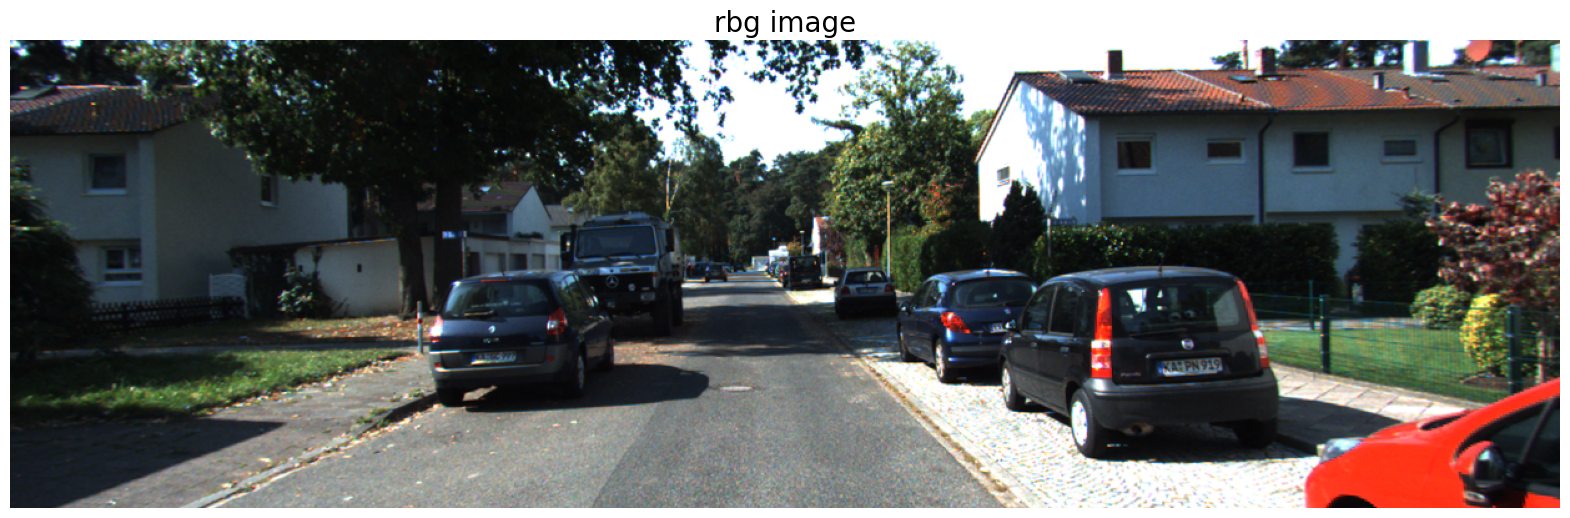

In [66]:
plt.figure(figsize=(20,10))
plt.imshow(rgb_img)
plt.axis("off")
plt.title("rbg image",fontsize=20)
'''plt.xlabel("xlabel")
plt.ylabel("ylabel")'''
plt.show

### Optional - If your LiDAR file is in binary extension '.bin', use this piece of code to turn it into a '.pcd' and save it

### Visualize the Image

### Visualize the Point Clouds

## 1 - Project the Points in the Image <p>
That part is possibly the hardest to understand and will require your full attention. We want to project the 3D points into the image.<p>

It means we'll need to: <p>

*   Select the Point that are **visible** in the image 🤔
*   Convert the Points **from the LiDAR frame to the Camera Frame** 🤯
*   Find a way to project **from the Camera Frame to the Image Frame** 😭

<p>
No worries here, we'll figure out everything together.


### 1.1 - Read the Calibration File

The first step is to read the calibration files. For each image, we have an associated calibration file that states:<p>


*   The instrinsic and extrinsic camera calibration parameters
*   The velodyne to camera matrices
*   All the other "sensor A" to "sensor B" matrices
<p>
They are made from this setup:<p>

![link text](http://www.cvlibs.net/datasets/kitti/images/setup_top_view.png)

Not everything matters to us here, only a few things:
*    **Velo-To-Cam is a variable we'll call V2C** -- It gives the rotation and translation matrices from the Velodyne to the Left Grayscale camera.
*    **R0_rect used in Stereo Vision to make the images co-planar.**
*   **P2 is the matrix obtained after camera calibration**. It contains the intrinsic matrix K and the extrinsic.


### 1.2 - Project the Points in the Image

The main formula we'll use will be as follows:<p>
**Y(2D) = P x R0 x R|t x X (3D)** 

However, when looking at the dimensions:

*   P: [3x4]
*   R0: [3x3]
*   R|t = Velo2Cam: [3x4]
*   X: [3x1]

We'll need to convert some points into Homogeneous Coordinates:
* RO must go from 3x3 to 4x3
* x must go from 3x1 to 4x1

Then, to retrieve the cartesian system, we'll divide as explained in the course.

--- TODO ---
Code the Project_velo_to_image function and test it for the first 5 points. Make sure it makes sense.

### 1.4 - LiDAR in Image Field Of View

###1.5 -- Get the LiDAR Points in Pixels

## 2 - Detect Obstacles in 2D

## 3 - Fuse Points Clouds & Bounding Boxes

**In this course, we'll see a few ways to filter outliers.** <p>
Outliers are the points that belong to the bounding box, but not to the object.<p>
Here's an example of outliers:<p>
![outlier image](https://i.ibb.co/Fg0KV3k/Screenshot-2021-05-31-at-22-31-29.png)

In this image, the points belong to the truck, but are also counted as part of the car.

The first technique we can use for that is a shrink factor.
Instead of considering the whole bounding box, we're considering only a part of it. **A common choice is 10-15% shrinking.**
![image_shrinks](https://i.ibb.co/Zcgzz6F/Screenshot-2021-05-31-at-22-45-36.png)

--- TODO --- Code a function that return the points inside a bounding box according to a shrink factor

**The second way will be through Outlier removal techniques. <p>**
We can cite a few: 3 Sigma, RANSAC, and others...

--- TODO--- Code a function to remove the outliers according to One Sigma

-- TODO-- Code a function that implements the fusion between boxes and points

### Build a Pipeline

## Comparing with the Ground Truth


## Inferece the video